# Python Exam (Master, 08/11/2022): Random walk

> + **Allocated time:** 1.5h
> + **Send your final notebook** at the end of the exam at [romain.madar@cern.ch](mailto:romain.madar@cern.ch)
> + **Allowed documents:** documentation of [python](https://docs.python.org/3/), [numpy](https://numpy.org/devdocs/user/index.html), [matplotlib](https://matplotlib.org/contents.html), [pandas](https://pandas.pydata.org/pandas-docs/stable/) and [scipy](https://docs.scipy.org/doc/scipy/reference/) as well as the documentation from the notebook interface using `Shift+tab` keyboard shortcut, `help(module)` or `help(function)`.
> 
> The final mark will be a number between 0 (very bad) and 20 (very good). The evaluation of this exam takes into account mainly the correctness of the answers, but also the clarity of the explanations and the quality of the code. *There is no required knowledge about random walks to answer the questions asked in this exam.*

## General informations

### A bit of context ...

A random walk (or "drunk man walk") describes the motion of an object in space, as a serie of steps where each step is done randomely. This type of random process appears in many physical systems (*e.g.* brownian motion) and have some universal properties which can be studied. In this exam, we propose to simulate a random walk in two dimensions and numerically study some of their properties. To better understand, you can imagine a random walk at one dimension : at each iteration of the walk (a step), the stystem randomely moves to the right (forward, step of $+1$) or to the left (backward, step of $-1$).


### Exam organisation

The exam is organized in three parts, starting beforehand with two short questions on the lecture itself. The goal of the first part is to implement the simulation of a 2D random walk, in pure python first and then exploiting numpy. The second part and third parts are devoted to the study of individual and collective properties of random walks. Finally, there is a bonus part related to a modified random walk (to be not that random).


### Import packages and plot cosmetics

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import matplotlib as mpl
mpl.rcParams['legend.frameon'] = False
mpl.rcParams['legend.fontsize'] = 'xx-large'
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['figure.figsize'] = (10, 7)

## 0. Questions on the lecture [2 pts]

**0.1 [1pts]** Explain in one sentence what the *vectorization* in numpy

> Vectorization is when an operation is performed between two arrays, it is actually looped over all elements in the arrays. There is an internal loop which is done.

**0.2 [1pts]** Give two examples of different behaviour of numpy array and python list

> 1. Addition of two lists *v.s.* two arrays
> 2. Having a list of indices is possible in numpy and impossible for a python list

## 1. Python *versus* numpy implementation [6 pts]

The equation which describes one single step of the random walk is $\vec{r}_{i+1} = \vec{r}_{i} + \vec{\Delta}_{i}$, where $\vec{r}_i$ is the position before the step, $\vec{r}_{i+1}$ is position after the step and $\vec{\Delta}_{i}$ is a *random vector*. Each coordinate of $\vec{\Delta}_{i}$ can take the value $-1$ or $1$ only, with a flat probablity $p=0.5$.

**1.1 [2 pts]** Using only native python functions, write a python function called `random_walk_py()` that takes in argument a number of steps `n` and return all the positions of the random walk, choosing a starting point of $\vec{r}_{0} \equiv (0, 0)$. More specifically, this function will return two arrays of length $n$ each, $\{x_i\}$ and $\{y_i\}$, such as each position is defined by $\vec{r}_{i} = (x_i, y_i)$. At this stage, we will use the function `random.randint()` from python (not the one from numpy) to handle random numbers, and you must write an explicit python `for` loop.

*hint:* to get a random number which is either -1 or 1, one could use a random number being 0 or 1, multiply by 2 and subtracting 1.


In [3]:
def random_walk_py(n=1000):
    
    '''
    Generate random walk at two dimensions with n steps.
    '''

    # Initial conditions
    X0, Y0 = 0, 0
    Xs, Ys = [X0], [Y0]
    
    # Evolution
    for i in range(0, n-1):

        # Random numbers
        delta_x = random.randint(0, 1) * 2 - 1
        delta_y = random.randint(0, 1) * 2 - 1

        # Append the next step
        Xs.append(Xs[i] + delta_x)
        Ys.append(Ys[i] + delta_y)

    return np.array(Xs), np.array(Ys)

**1.2 [1 pts]** Generate a random walk of 10000 steps and plot the trajectory using `plt.scatter()` function. One would represent the time (or the step index) using the color of the markers. 

*hint:* one can display the color scale bar using `plt.colorbar()` command.

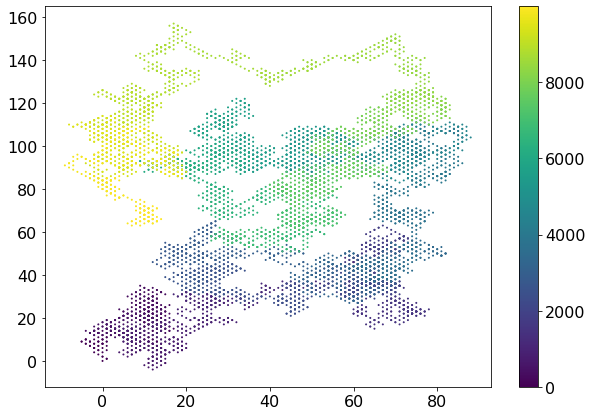

In [4]:
N = 10000
xs, ys, ts = *random_walk_py(N), np.arange(0, N)
plt.scatter(xs, ys, s=1, c=ts);
plt.colorbar();

**1.3 [2 pts]** In this question, we want to write a new function `random_walk_np()` exploiting the power of numpy, especially without explicit `for` loops. Once the function is written, generate one random walk and plot it as done in *question 1.2*

*hint:* the function to generate random integers in numpy is `np.ramdom.randint()`

In [5]:
def random_walk_np(n=1000):
    
    '''
    Generate random walk at two dimensions using numpy
    '''
    
    # Random numbers
    delta = np.random.randint(low=0, high=2, size=(n, 2))*2 - 1
    
    # Summing over the n steps
    rs = np.cumsum(delta, axis=0)

    return rs[:, 0], rs[:, 1] 

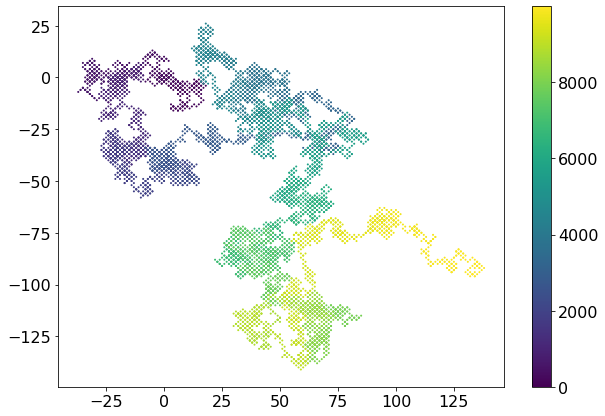

In [6]:
N = 10000
xs, ys, ts = *random_walk_np(N), np.arange(0, N)
plt.scatter(xs, ys, s=1, c=ts);
plt.colorbar();

**1.4 [1 pts]** Compare the rapidity of the two function using the command `%timeit my_func()`, and conclude.

In [7]:
%timeit random_walk_py(10000)
%timeit random_walk_np(10000)

23.3 ms ± 6.54 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
152 µs ± 8.18 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


## 2. Individual properties of random walks [6 pts]

The goal of this section is perform some computation related to a single random walk, while the next section will be devoted to the anlaysis of the statistical behaviour of random walks.
 
**2.1 [1 pts]** Plot the distance from the origin, as function of time (or step index), in other words $|\vec{r}_i|$ as function of $i$.

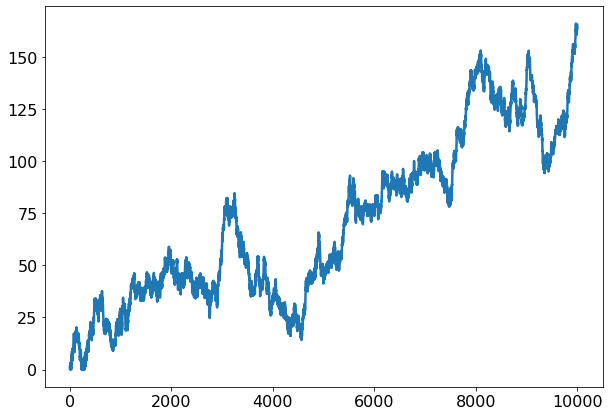

In [8]:
d = np.sqrt( xs**2 + ys**2 )
plt.plot(ts, d);

**2.2 [1 pts]** Plot the distribution of the $x$'s and $y$'s values overlaid on the same plot.

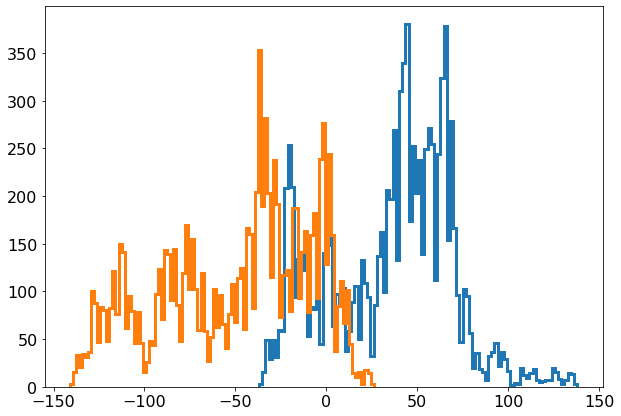

In [9]:
plt.hist(xs, bins=100, histtype='step', linewidth=3);
plt.hist(ys, bins=100, histtype='step', linewidth=3);

**2.3 [1 pts]** Compute and print the asymmetry $A_x$ ($A_y$) of the sample of points with respect to 0 along the $x$-axis ($y$-axis), defined as $A_i = \frac{N(i>0) - N(i<0)}{N(i>0) + N(i<0)}$ where $N(cond)$ is the number of points satisfying a given condition.

In [10]:
Ax = ( np.count_nonzero(xs>0) - np.count_nonzero(xs<0) ) / N
Ay = ( np.count_nonzero(ys>0) - np.count_nonzero(ys<0) ) / N

print(Ax, Ay)

0.5998 -0.8013


**2.4 [2 pts]** Compute the distance of each step, namely $|\vec{\Delta_i}|$, using the arrays $\{x_i\}$ and $\{y_i\}$. Plot this distance as function of time (or step index). Can you comment the result?

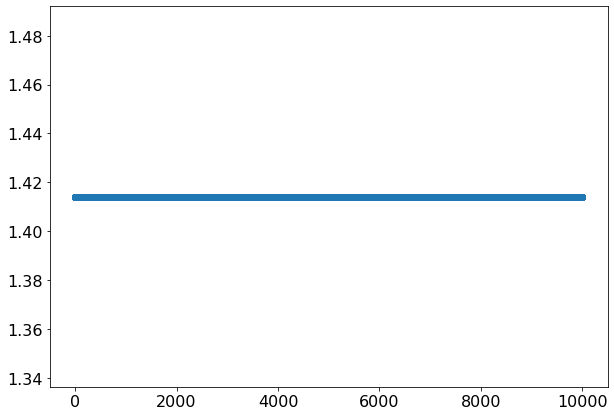

In [11]:
dxs = xs[1:] - xs[:-1]
dys = ys[1:] - ys[:-1]
drs = np.sqrt(dxs**2 + dys**2)
plt.plot(ts[:-1], drs, 'o');

**2.5 [1 pts]** Compare the evolution of the distance $|\vec{r}_i|$ with time for 5 different random walks. Could you comment?

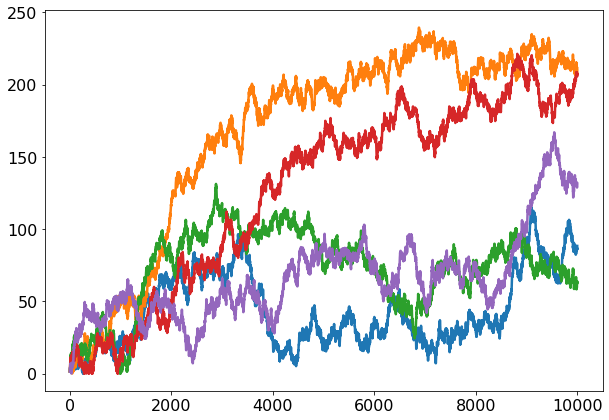

In [12]:
N = 10000
ts = np.arange(0, N)
for i in range(5):
    xs, ys = random_walk_np(N)
    d = np.sqrt( xs**2 + ys**2 )
    plt.plot(ts, d);

## 3. Statistical properties of random walks [6 pts]

The goal of this last section is analyse the statistical properties of random walks, and find in particular typical time dependence of the diffusion processes $d \sim \sqrt{t}$. 

**3.1 [1 pts]** Using an explicit for loops, simulate 10000 random walks of 10000 steps each, and plot the distribution of the final 10000th $x$ and $y$ values of each random walk. Compute and print the RMS of the two distributions.

In [13]:
Nrw, Nst = 10000, 10000
xFinal, yFinal = [], []

for i in range(Nrw):
    xs, ys = random_walk_np(Nst)
    xFinal.append(xs[-1])
    yFinal.append(ys[-1])
    
xFinal = np.array(xFinal)
yFinal = np.array(yFinal)

sigma[x] = 100.6
sigma[y] = 100.4


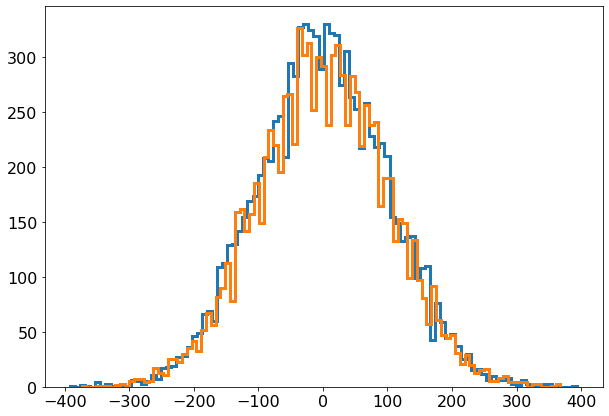

In [14]:
plt.hist(xFinal, bins=100, histtype='step', linewidth=3)
plt.hist(yFinal, bins=100, histtype='step', linewidth=3)
print(f'sigma[x] = {xFinal.std():.1f}\nsigma[y] = {yFinal.std():.1f}')

**3.2 [3 pts]** By considering now all the positions of the 10k random walks (and not only the final position), investigate the evolution of the RMS of the $\{x_i\}$ and $\{y_i\}$ positions distribution over the 10k walks, with time (or the step index).

In [15]:
Nrw, Nst = 10000, 10000
xFinal, yFinal = [], []

for i in range(Nrw):
    xs, ys = random_walk_np(Nst)
    xFinal.append(xs)
    yFinal.append(ys)
    
xFinal = np.array(xFinal)
yFinal = np.array(yFinal)

In [16]:
rmsX = np.std(xFinal, axis=0)
rmsY = np.std(yFinal, axis=0)

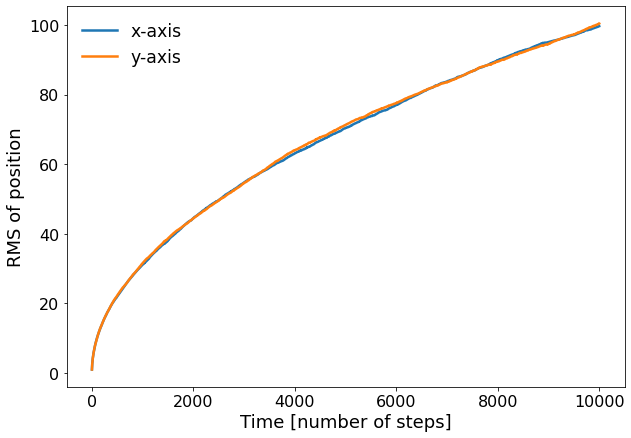

In [17]:
plt.plot(rmsX, label='x-axis')
plt.plot(rmsY, label='y-axis')
plt.xlabel('Time [number of steps]')
plt.ylabel('RMS of position')
plt.legend();

**3.3 [2 pts]** Plot the distribution of the asymmetry over the 10k random walks.

In [18]:
Ax = (np.count_nonzero(xFinal>0, axis=1) - np.count_nonzero(xFinal<0, axis=1)) / xFinal.shape[1]
Ay = (np.count_nonzero(yFinal>0, axis=1) - np.count_nonzero(yFinal<0, axis=1)) / yFinal.shape[1]

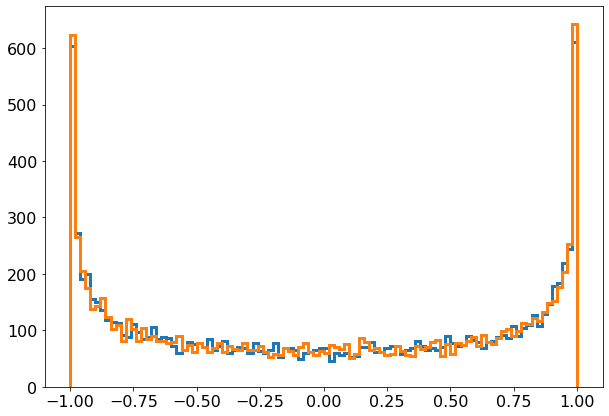

In [19]:
plt.hist(Ax, bins=100, histtype='step', linewidth=3);
plt.hist(Ay, bins=100, histtype='step', linewidth=3);

## 4. Bonus question [3 pts]

We will now consider a modified random walk, for which one direction will be favoured. We will assume that there is a force along the $x$-axis direction, modifying the probability of doing forward and backward steps. In practice, you will need to re-write the function `random_walk_np()` with two arguments, the number of steps and the asymmetry $p$ along the x-axis, such as the probablity of the steps $+1$ and $-1$ along the $x$-axis will be $0.5+p$ and $0.5-p$ respectively, where $p \in [0, 0.5]$. This new function can be called `random_walk_np_asym()`.

**4.1 [1 pts]** Write the function `random_walk_np_asym()`.

*hint:* one can use the function `np.random.choice()` to randomly choose between two values, possibly with some associated probabilities.

In [20]:
def random_walk_np_asym(n=1000, p=0):
    
    '''
    Generate random walk at two dimensions using numpy, 
    with an external force along the x-axis.
    '''
    
    # Random numbers
    deltaX = np.random.choice(a=[-1, 1], size=n, p=[0.5-p, 0.5+p])
    deltaY = np.random.choice(a=[-1, 1], size=n)
    
    # Summing over the n steps
    Xs = np.cumsum(deltaX, axis=0)
    Ys = np.cumsum(deltaY, axis=0)

    return Xs, Ys

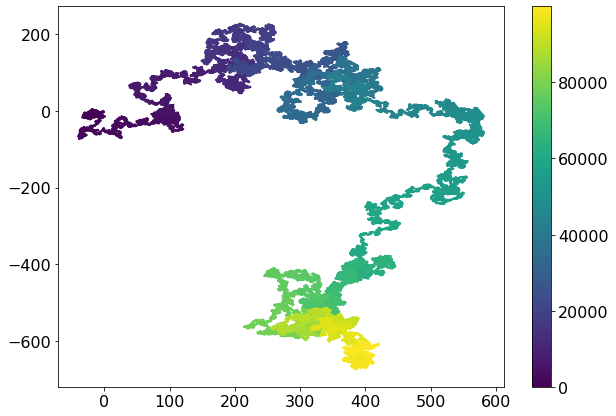

In [21]:
N = 100000
xs, ys, ts = *random_walk_np_asym(N, 0.0), np.arange(0, N)
plt.scatter(xs, ys, s=1, c=ts);
plt.colorbar();

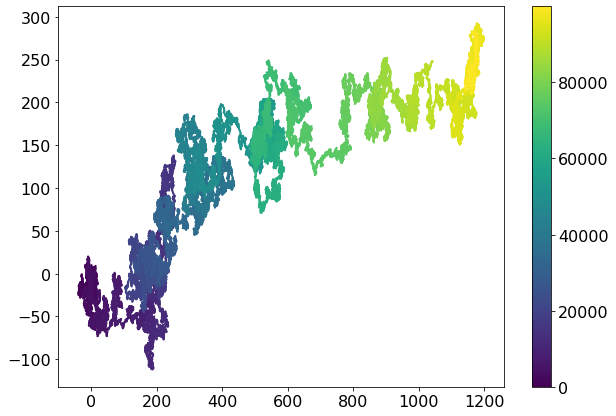

In [22]:
N = 100000
xs, ys, ts = *random_walk_np_asym(N, 5e-3), np.arange(0, N)
plt.scatter(xs, ys, s=1, c=ts);
plt.colorbar();

**4.2 [2 pts]** Plot the mean and the RMS of the $x$ coordinate of the last position for 10000 random walks of 10000 steps, as function of $p$. Interpret the results.

In [23]:
Nrw, Nst = 10000, 10000
ps = np.arange(-0.5, 0.5, 0.1, )
xFinal, yFinal = [], []

for i in range(Nrw):
    
    Xs, Ys = [], []
    for p in ps:
        xs, ys = random_walk_np_asym(Nst, p)
        Xs.append(xs[-1])
        Ys.append(ys[-1])
    
    xFinal.append(Xs)
    yFinal.append(Ys)
    
xFinal = np.array(xFinal)
yFinal = np.array(yFinal)

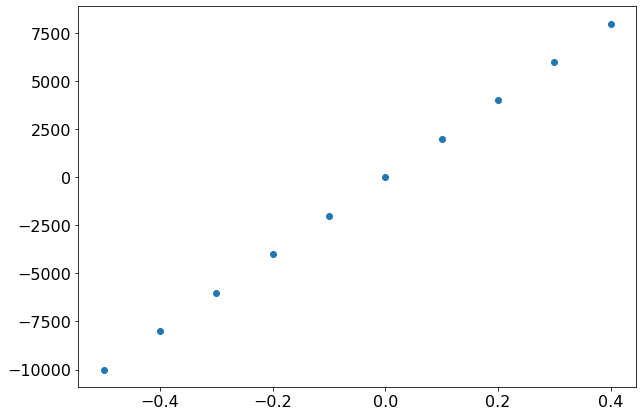

In [24]:
means = np.mean(xFinal, axis=0)
plt.plot(ps, means, 'o');

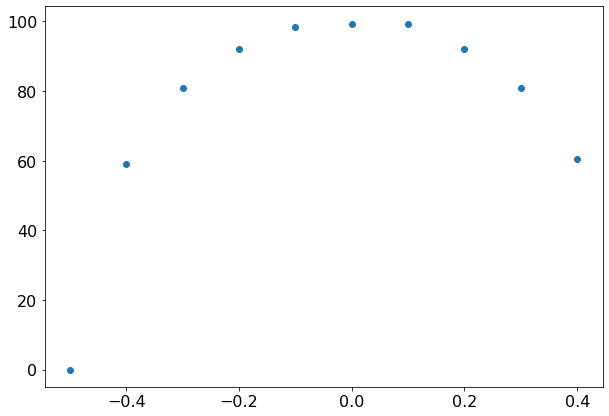

In [25]:
std = np.std(xFinal, axis=0)
plt.plot(ps, std, 'o');